
 ### <span style='background:yellow'>Problem Statement : _Parkinson’s Disease Detection Using Machine Learning_  </span>

## <span style='color:Orange'> Data Analysis  </span> 
#### The Data set has  been taken from the following Kaggle link:
[Click  here for Dataset](https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set)
### <span style='color:Orange'> Details About the Dataset  </span> 
#### Data Set Information:
This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinsons Disease, according to the "status" column which is set to 0 for healthy and 1 for Parkinsons Disease.

#### Attribute Information:
Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%) , MDVP:Jitter(Abs) , MDVP:RAP , MDVP:PPQ , Jitter:DDP - Several measures of  variation in fundamental frequency
- MDVP:Shimmer , MDVP:Shimmer(dB) , Shimmer:APQ3 , Shimmer:APQ5 , MDVP:APQ , Shimmer:DDA - Several measures of variation in amplitude
- NHR , HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE , D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1 , spread2 , PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
# import the necessary library for data 
import pandas as pd
import numpy as np

In [2]:
# Loading the Data from the Dataset file
data=pd.read_csv('parkinsons_data.data')
data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [12]:
# To see all the columns 
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)
# data

In [11]:
#To find the number of rows and columns in our dataset
data.shape
# Our Data Contains 195 rows and 24 Columns

(195, 24)

In [4]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [12]:
# To check any null values in our data
data.isnull().sum()
# so as shown below our data doesnot contain any null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
# More Details About the Data Attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Our data does not contain any categorical value except the name column.
So we will drop the name column 

In [3]:
# Splitting the dataset into dependent and independent variable
X=data.drop(['name','status'],axis=1)
Y=data['status']

In [15]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [16]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [17]:
# to find the count of people who have status=1(PD)and status=0(No PD)
Y.value_counts()


1    147
0     48
Name: status, dtype: int64

In [18]:
# Grouping by the mean of status Column
data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [4]:
#Splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
X_train.shape

(156, 22)

In [15]:
X_test.shape

(39, 22)

In [9]:
X_test.shape[0]+X_train.shape[0]

195

In [53]:
Y_train.shape

(156, 1)

In [54]:
Y_test.shape

(39, 1)

In [56]:
Y_test.shape[0]+Y_train.shape[0]

195

In [5]:
# Feature scalling--standardization
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [6]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.421062,0.050572,-0.936908,-0.363102,-0.413120,-0.289164,-0.403844,-0.289240,-0.538972,-0.501963,...,-0.331247,-0.666959,-0.374815,0.920834,-0.788101,0.087591,-0.446885,-0.074825,0.494832,-0.644404
1,-0.956946,-0.731335,-0.108481,-0.504316,-0.413120,-0.502704,-0.410615,-0.503809,0.002196,-0.107142,...,0.174092,-0.074118,-0.209086,-0.653884,1.236308,-0.366199,-0.156159,0.006086,0.113351,-0.229204
2,1.218479,0.287394,-0.677834,-0.525307,-0.683338,-0.477946,-0.481709,-0.476988,-0.523145,-0.531209,...,-0.537209,-0.450921,-0.167654,-0.679143,0.365344,-1.523494,-0.185774,-0.228799,0.179820,-0.184494
3,-0.449635,-0.273271,-1.172322,0.621578,0.667748,0.589755,0.422204,0.588637,0.998761,0.945715,...,0.717697,1.095771,0.138221,-0.705067,0.436006,0.312342,0.447203,-0.091813,0.634056,0.411525
4,-1.469578,-0.727894,-0.544519,-0.179906,0.397531,-0.156088,-0.072071,-0.155134,-0.474134,-0.477591,...,-0.418472,-0.492613,-0.380475,0.013272,1.145392,1.048768,0.180799,1.134218,-0.212728,0.285469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-0.100684,-0.497749,-0.940577,-0.758119,-0.683338,-0.737908,-0.735617,-0.737978,-0.965269,-0.887035,...,-0.816890,-1.014073,-0.510659,1.109392,-1.983312,0.113869,-1.083634,-1.707012,-1.056047,-1.014075
152,-0.434296,-0.375249,-1.166189,0.529980,0.667748,0.506196,0.371422,0.505079,0.045591,0.092706,...,0.080114,0.043060,-0.020716,-0.392871,-0.007444,0.236336,0.340355,-0.320444,-0.294697,0.226651
153,0.413907,2.520733,-0.851660,-0.172273,-0.413120,-0.307733,-0.312437,-0.308840,-0.662011,-0.555581,...,-0.455050,-0.792034,-0.214746,0.872531,-0.119323,-0.731647,1.006372,1.662492,1.517512,0.851217
154,2.464914,0.593482,1.653225,-0.878342,-1.034620,-0.778140,-0.813483,-0.778210,-0.954548,-0.906533,...,-0.900738,-0.927531,-0.524923,1.119585,1.094494,-1.476540,-1.487893,-0.377471,-0.991016,-1.318376


In [7]:
X_test = pd.DataFrame(X_test)
X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.392407,-1.031776,-0.639882,-0.406993,-0.142903,-0.298448,-0.322594,-0.297493,-0.407764,-0.423973,...,-0.511323,-0.299000,-0.423040,0.108991,0.763394,1.027398,-0.301882,-1.838828,-0.924842,-0.314383
1,-0.435376,-0.444075,0.409642,-0.672246,-0.683338,-0.697676,-0.678065,-0.696715,-0.899920,-0.862664,...,-0.743172,-0.887419,-0.491188,0.875411,-0.375951,-1.264089,-0.780066,-0.950001,-0.957477,-0.742630
2,1.204948,0.084173,1.998294,-0.887883,-0.980576,-0.775045,-0.833795,-0.776147,-1.055634,-0.994271,...,-0.980084,-1.064608,-0.606429,2.422211,-1.279866,0.474773,-1.832681,-0.643519,-2.272727,-1.652650
3,1.402645,0.299626,1.712905,-0.212347,-0.413120,-0.069434,-0.248114,-0.068481,-0.684985,-0.682313,...,-0.652571,-0.693174,-0.482358,0.425176,-0.567436,0.112008,-0.244763,0.211142,0.228665,-0.308506
4,-1.047397,-0.714560,-0.207465,-0.553932,-0.413120,-0.549126,-0.552804,-0.548167,-0.849377,-0.779800,...,-0.743172,-0.879839,-0.524243,1.037824,-0.840402,0.740602,-0.575133,-0.162897,-0.554602,-0.501080
5,-1.198802,-0.924857,-0.511902,-0.107391,0.397531,-0.162278,-0.116082,-0.162355,0.975277,0.740993,...,0.669864,1.033550,0.063507,-1.039642,1.363975,0.510012,0.361666,1.046254,-0.073364,0.412619
6,-1.057363,-0.731968,-0.405144,-0.240971,0.127314,-0.162278,-0.234572,-0.162355,-0.646184,-0.653067,...,-0.617681,-0.592420,-0.297837,-0.118121,0.570967,-0.785243,0.072250,-0.567802,-1.406089,0.073517
7,0.049466,-0.084262,-0.832636,0.092980,-0.142903,0.184338,0.141212,0.184257,-0.346500,-0.316738,...,-0.416783,-0.287629,-0.165390,-0.566363,1.175946,0.224547,-0.227489,-1.062624,-1.252910,-0.262315
8,-1.091430,-0.768398,-0.168813,-0.288679,-0.142903,-0.258216,-0.237957,-0.258292,-0.295957,-0.355733,...,-0.354319,-0.152448,-0.514281,0.816695,-0.607357,1.821070,0.350632,-0.365701,-0.468794,0.428439
9,-0.030692,-0.281092,-1.102960,0.184579,0.127314,0.063641,0.266473,0.063561,1.273940,1.233301,...,1.860618,0.832357,0.092713,-0.990896,1.634015,0.061149,1.600920,1.492806,1.870036,1.896882


#####  Note : For Feature Scaling we can choose any one option out of Standardization / Normalization.Here we opt for Standardization.

In [18]:
# # Feature scalling --Normalization
# from sklearn.preprocessing import MinMaxScaler
# mss=MinMaxScaler()
# X_train=mss.fit_transform(X_train)
# X_test=mss.transform(X_test)

In [77]:
# X_train = pd.DataFrame(X_train)
# X_train

In [19]:
# X_test = pd.DataFrame(X_test)
# X_test

## <span style='color:Orange'> Data Visualization  </span>


###  Data Visualization using Matplot library

In [42]:
import matplotlib.pyplot as plt

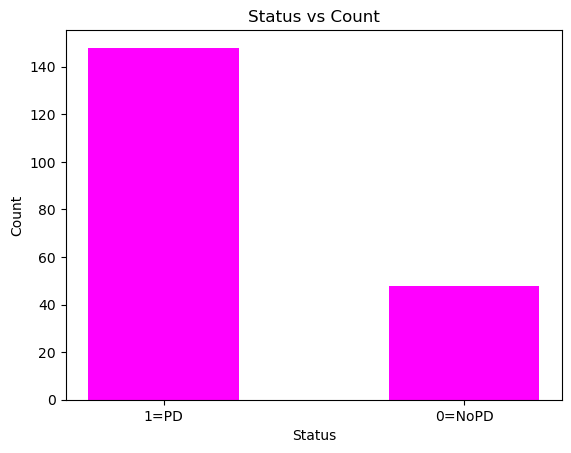

In [20]:
# bar plot---Verticle bar
Status=['1=PD','0=NoPD']
Count=[148,48] # got the value from value_counts method
plt.bar(Status, Count, color='magenta',width=0.5)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title("Status vs Count")
plt.show()

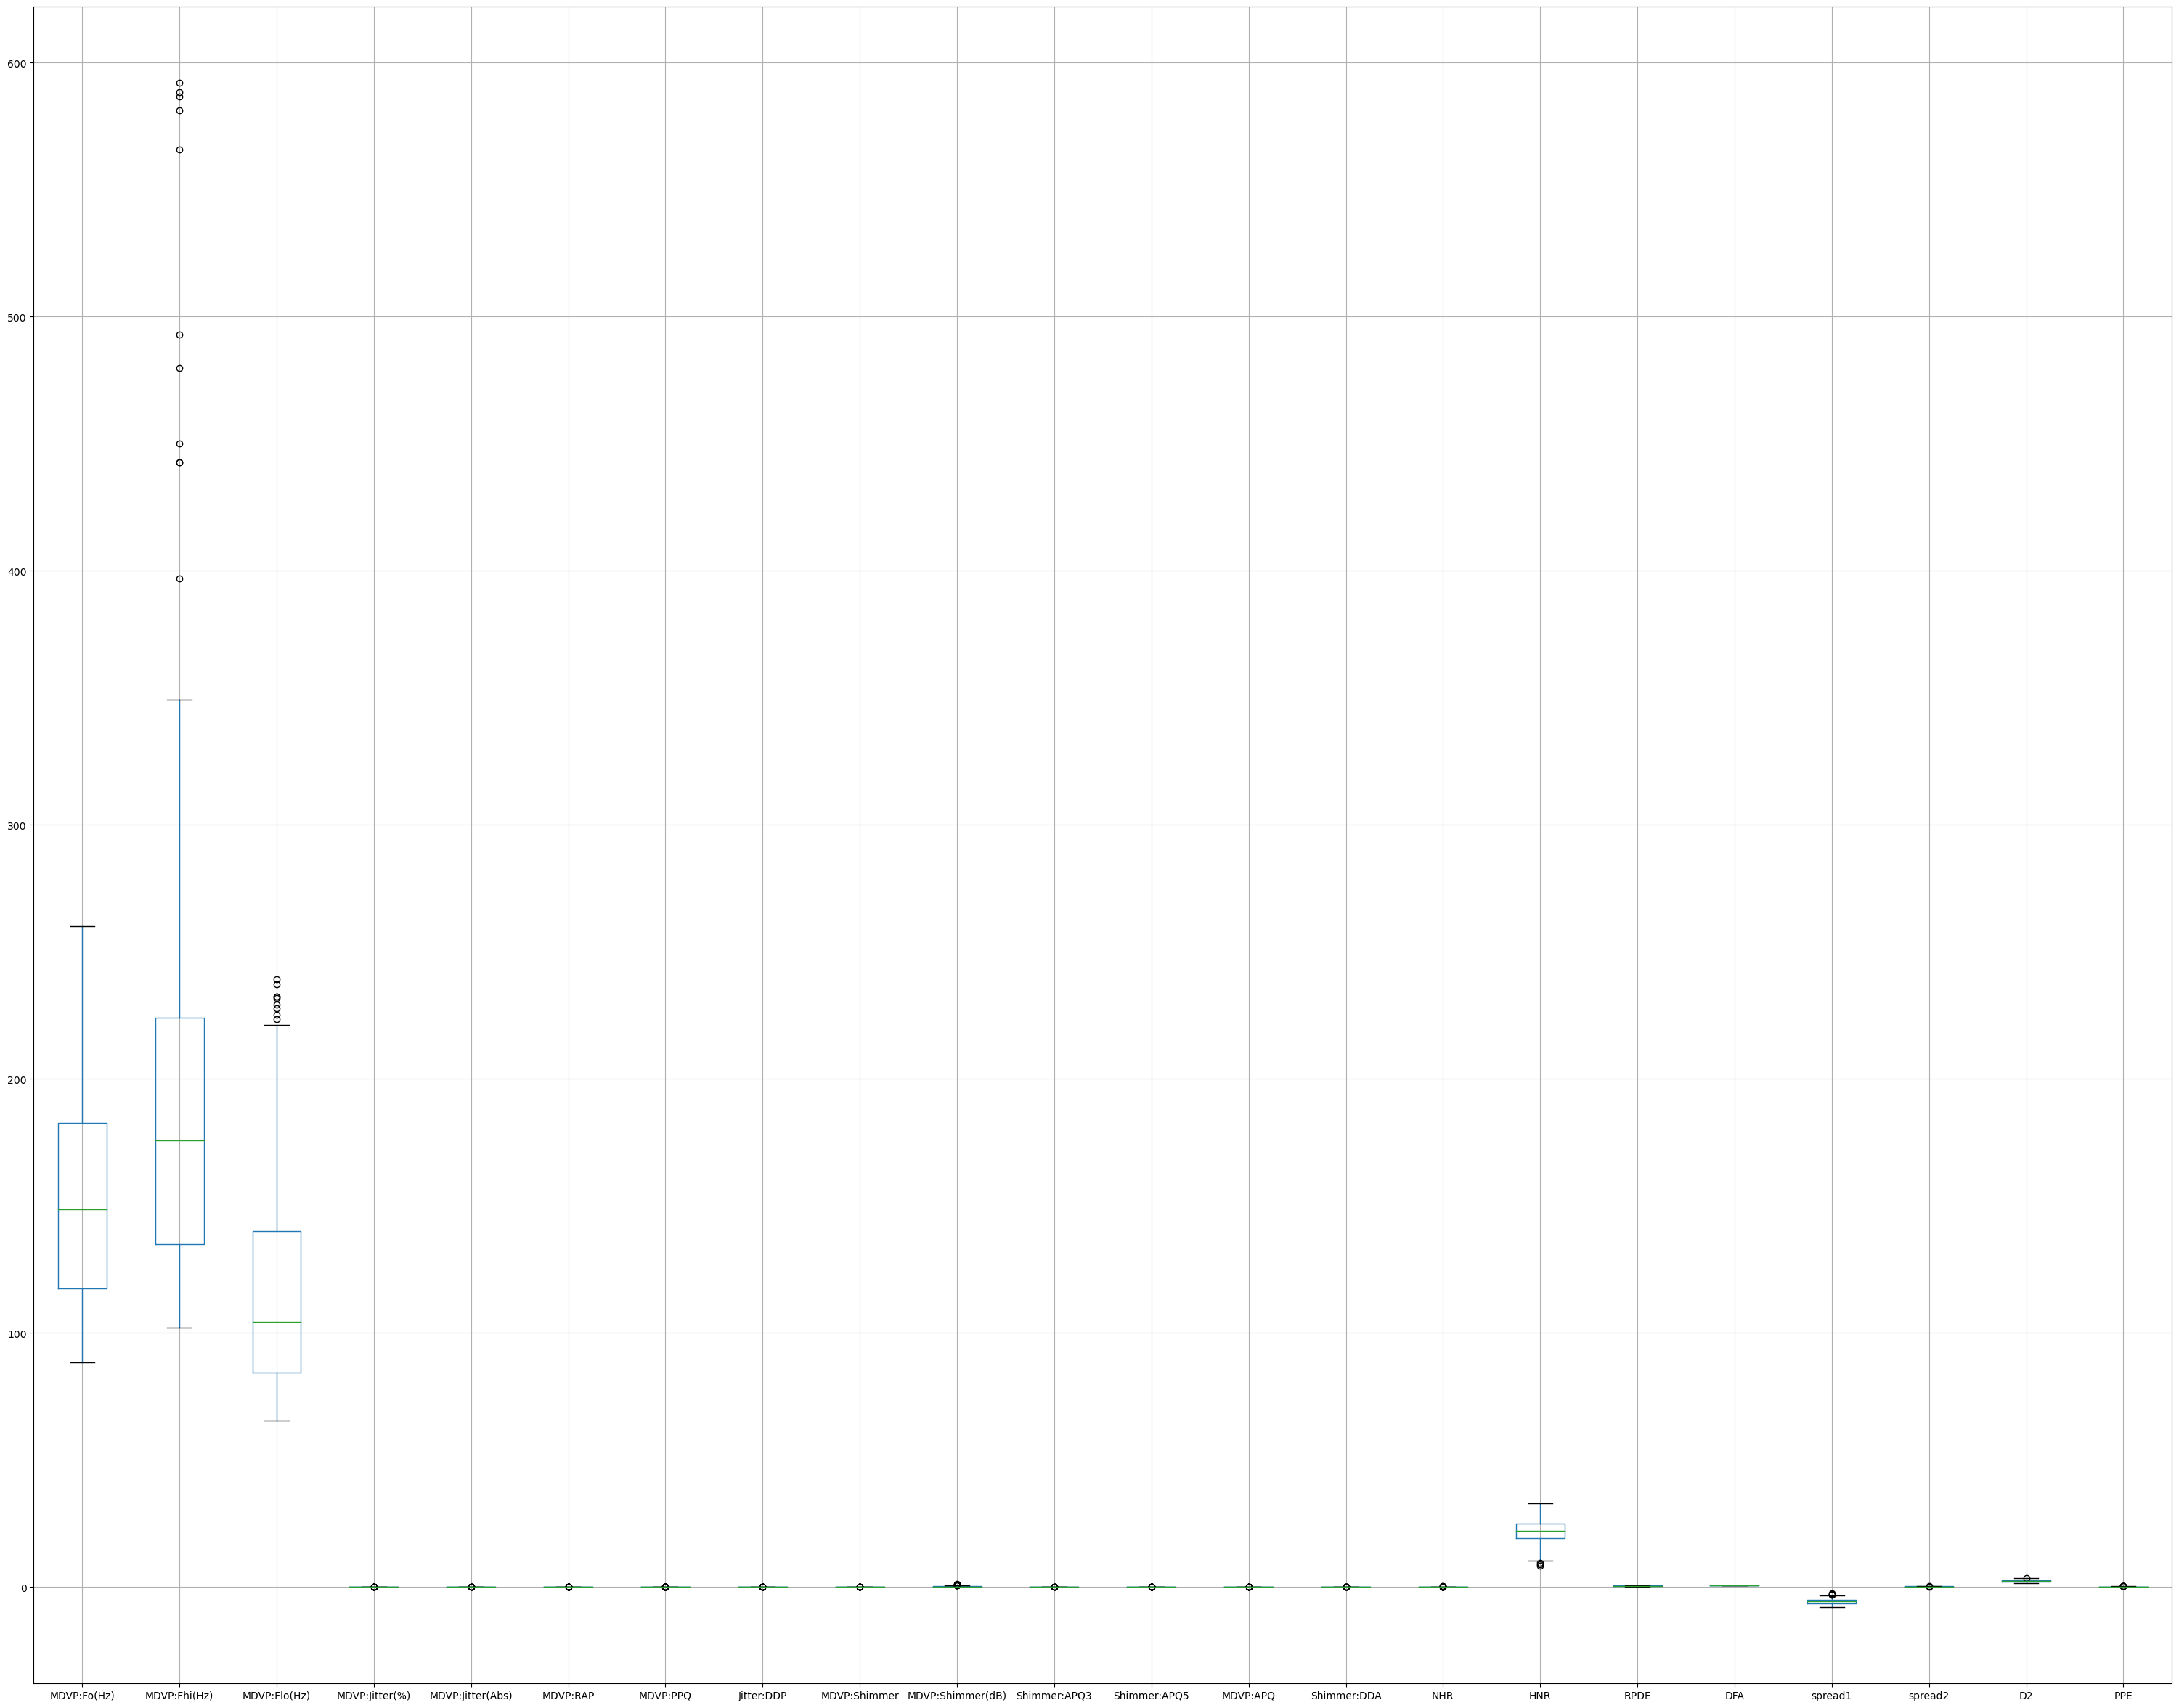

In [43]:
# Creating a box plot to show the data variation(mean,median,outliers) for every attribute
X.boxplot(figsize=(38,30))
 
# show plot
plt.show()


### Data Visualization Using Seaborn Library

In [22]:
# import the seaborn lib
import seaborn as sns

C:\Users\guru\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='status', ylabel='Density'>

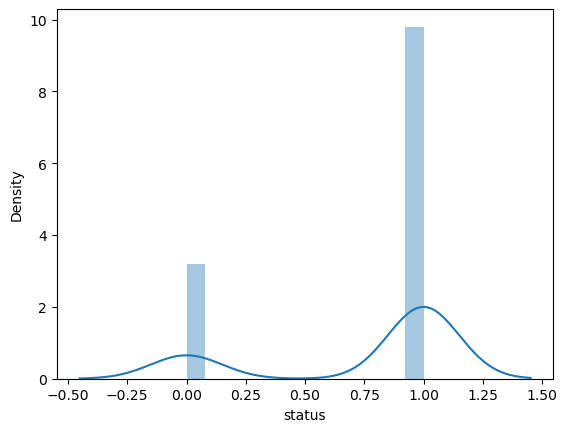

In [23]:
# distribution plot
sns.distplot(data['status'],hist=True) 

C:\Users\guru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

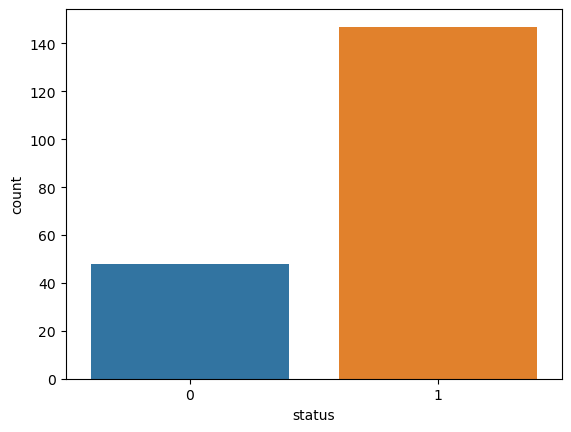

In [24]:
# count plot using seaborn library without actually getting the value counts for respective status
sns.countplot(data['status'])

### <span style='color:green'> Representation Using Pair Plots  </span> 

Since here we have 22 numerical columns so 22x22=484.Hence we can have 484 pair plots.Hence we can consider the relevant variables to plot correlation between.Shown below is the pair plot between the first three variables
- MDVP:Fo(Hz)	
- MDVP:Fhi(Hz)	
- MDVP:Flo(Hz)

Similary the pairplot for other variables can be visualized

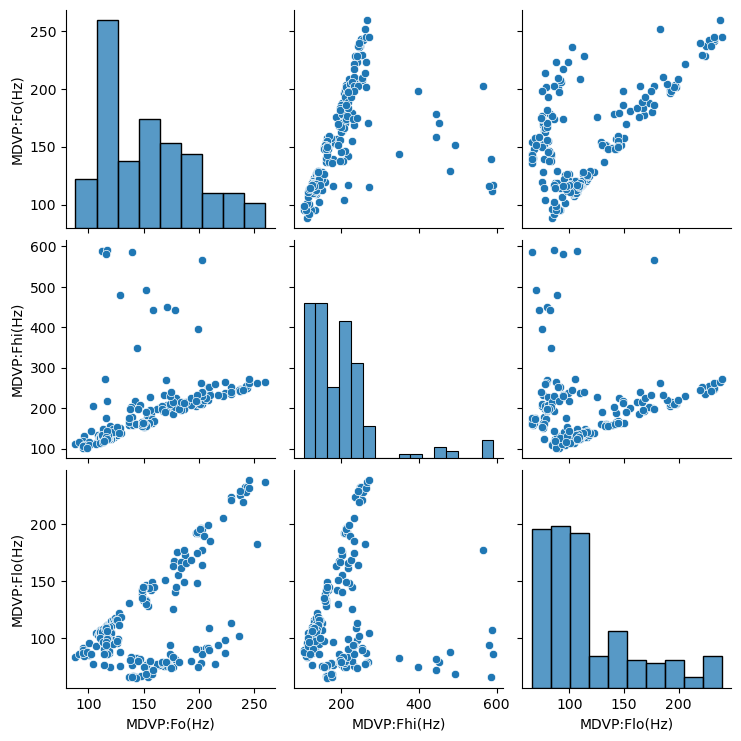

In [25]:
# pair plot---correlation among numerical columns
X1=data.iloc[:,1:4]# correlation between 
X1
sns.pairplot(X1)

In [26]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### <span style='color:green'> Representation Using Heat Maps  </span> 
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.Since most of the values in the original dataset lie between 0 to 1. So below mentioned are few columns whose value>1 and we will plot those values on heatmap:
- MDVP:Fo(Hz)	
- MDVP:Fhi(Hz)	
- MDVP:Flo(Hz)
- HNR(Not much variation)

We can plot the heatmap for all the 195 values of phone recordings buut that will create a clutter

In [27]:
X2=data.iloc[0:24:,[1,2,3,16]]
X2

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),HNR
0,119.992,157.302,74.997,21.033
1,122.400,148.650,113.819,19.085
2,116.682,131.111,111.555,20.651
3,116.676,137.871,111.366,20.644
4,116.014,141.781,110.655,19.649
5,120.552,131.162,113.787,21.378
6,120.267,137.244,114.820,24.886
7,107.332,113.840,104.315,26.892
8,95.730,132.068,91.754,21.812
9,95.056,120.103,91.226,21.862


<AxesSubplot:>

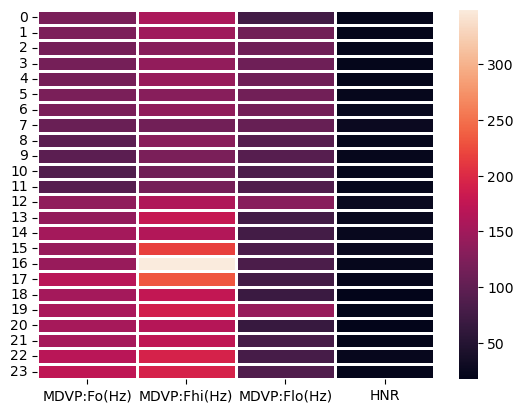

In [28]:
sns.heatmap(X2,linewidth=2)

## <span style='color:Orange'> Model Training and Prediction  </span>

### <span style='color:green'> Model 1:Logistic Regression  </span>

In [8]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X_train, Y_train)

LogisticRegression()

In [9]:
# Prediction
Y_pred=LRC.predict(X_test)
Y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39



In [11]:
# evaluating the perfromance of the model
# confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
print(cm)

[[ 7  3]
 [ 5 24]]


In [12]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 79.48717948717949
Precision= 88.88888888888889


### <span style='color:green'> Model 2: K-Nearest Neighbors  </span>

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [43]:
# predictions
Y_pred=knn.predict(X_test)
Y_pred

C:\Users\guru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[ 9,  1],
       [ 2, 27]], dtype=int64)

In [46]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 92.3076923076923
Precision= 96.42857142857143


### <span style='color:green'> Model 3:  Naive Bayes  </span>

In [47]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [48]:
Y_pred=nb.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [49]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[10,  0],
       [12, 17]], dtype=int64)

In [50]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 69.23076923076923
Precision= 100.0


### <span style='color:green'> Model 4:  Extreme Gradient Boosting(XGBoost)  </span>

In [52]:
# pip install xgboost

In [21]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, Y_train) # fit with x and y train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
Y_pred=XGBC.predict(X_test)
Y_pred

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[10,  0],
       [ 2, 27]], dtype=int64)

In [56]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 94.87179487179486
Precision= 100.0


### <span style='color:green'> Model 5:  Support Vector Machine(SVM)  </span>

In [57]:
from sklearn.svm import SVC
SVMC=SVC()
SVMC.fit(X_train, Y_train)

SVC()

In [58]:
Y_pred=SVMC.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 7,  3],
       [ 0, 29]], dtype=int64)

In [60]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 92.3076923076923
Precision= 90.625


### <span style='color:green'> Model 6:  Decision Trees  </span>

In [61]:
# train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DTC_entr=DecisionTreeClassifier(criterion='entropy')
DTC_entr.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
Y_pred=DTC_entr.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [63]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[10,  0],
       [ 6, 23]], dtype=int64)

In [64]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 84.61538461538461
Precision= 100.0


In [65]:
from sklearn.tree import DecisionTreeClassifier
DTC_gini=DecisionTreeClassifier(criterion='gini')
DTC_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

In [66]:
Y_pred=DTC_gini.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [67]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[ 8,  2],
       [ 3, 26]], dtype=int64)

In [123]:
# accuracy
from sklearn.metrics import accuracy_score,precision_score
print('Accuracy=',accuracy_score(Y_test, Y_pred)*100)
print('Precision=',precision_score(Y_test, Y_pred)*100)

Accuracy= 87.17948717948718
Precision= 92.85714285714286


## <span style='color:purple'> Comparision of Different Models  </span>


Model  |  Accuracy |  Precision
:----------:|:---------:|:------------|
Logistic Regression|79.49%|88.89%
KNN	|92.31%|96.43%
NaiveBayes|69.23%|100%
XGBoost|94.87%|100%
SVM|92.31%|90.63%
Decision Trees(entropy criterion)|84.62%|100%
Decision Trees(gini criterion)|87.18%|92.86%


###  <span style='color:blue'> Difference Between Accuracy and Precision  </span>
Accuracy measures how close a measurement is to the true value or expected value while precision measures how close multiple measurements are to each other.
Based on above model analysis we can see that __XG Boost__ is the most precise and accurate model
Using  the __XG Boost__ model we can build an interactive prediction system as below

###  <span style='color:blue'> User Interactive I/O Prediction </span>
We will input the values from the above given __data__ excluding  the following two values 
- Name 
- Status

As an example the following values with status as **1**
will predict __"Parkinson's Disease Found"__

120.26700,137.24400,114.82000,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.14000,0.00779,0.00937,0.01351,0.02337,0.00607,24.88600,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756


In [40]:
input_value=input("Enter all the data values except the name and status to test")
list_value=input_value.split(",")
float_values=[float(val) for val in list_value]
# print(float_values)
array_values=np.array(float_values)
print(array_values)
print(type(array_values))
print(array_values.ndim)
print(array_values.shape)
print()
print()
# ValueError: Expected 2D array, got 1D array instead:
# array=[ 1.202670e+02  1.372440e+02  1.148200e+02  3.330000e-03  3.000000e-05
#   1.550000e-03  2.020000e-03  4.660000e-03  1.608000e-02  1.400000e-01
#   7.790000e-03  9.370000e-03  1.351000e-02  2.337000e-02  6.070000e-03
#   2.488600e+01  5.960400e-01  7.641120e-01 -5.634322e+00  2.576820e-01
#   1.854785e+00  2.117560e-01].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) 
# if it contains a single sample.
reshaped_values=array_values.reshape(1,-1)
print()
print()
print(reshaped_values)
print(type(reshaped_values))
print(reshaped_values.ndim)
print(reshaped_values.shape)
transformed_value=ss.transform(reshaped_values)
predict=XGBC.predict(transformed_value)
if predict==0:
    print("No Parkinson's Disease Found")
else:
    print("Parkinson's Disease Found")


Enter all the data values except the name and status to test120.26700,137.24400,114.82000,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.14000,0.00779,0.00937,0.01351,0.02337,0.00607,24.88600,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
[ 1.202670e+02  1.372440e+02  1.148200e+02  3.330000e-03  3.000000e-05
  1.550000e-03  2.020000e-03  4.660000e-03  1.608000e-02  1.400000e-01
  7.790000e-03  9.370000e-03  1.351000e-02  2.337000e-02  6.070000e-03
  2.488600e+01  5.960400e-01  7.641120e-01 -5.634322e+00  2.576820e-01
  1.854785e+00  2.117560e-01]
<class 'numpy.ndarray'>
1
(22,)




[[ 1.202670e+02  1.372440e+02  1.148200e+02  3.330000e-03  3.000000e-05
   1.550000e-03  2.020000e-03  4.660000e-03  1.608000e-02  1.400000e-01
   7.790000e-03  9.370000e-03  1.351000e-02  2.337000e-02  6.070000e-03
   2.488600e+01  5.960400e-01  7.641120e-01 -5.634322e+00  2.576820e-01
   1.854785e+00  2.117560e-01]]
<class 'numpy.ndarray'>
2
(1, 22)
Parkinson's Disease Found


C:\Users\guru\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


##  <span style='color:brown'> End of File </span>